In [1]:
import pandas as pd
from datetime import datetime
from scipy.stats import pearsonr

In [2]:
gdp_df = pd.read_csv("united-states-gdp-growth-rate.csv")

In [3]:
gdp_df

,date,GDP Growth (%),Annual Change
0,12/31/1961,2.3000,NaN
1,12/31/1962,6.1000,3.80
2,12/31/1963,4.4000,-1.70
3,12/31/1964,5.8000,1.40
4,12/31/1965,6.4000,0.60
...,...,...,...
56,12/31/2017,2.2557,0.59
57,12/31/2018,2.9189,0.66
58,12/31/2019,2.2889,-0.63
59,12/31/2020,-3.4046,-5.69


In [4]:
fed_funds_df = pd.read_csv("FEDFUNDS.csv")

In [5]:
fed_funds_df

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
812,2022-03-01,0.20
813,2022-04-01,0.33
814,2022-05-01,0.77
815,2022-06-01,1.21


In [6]:
cpi_df = pd.read_csv("Bureau of Labor Statistics Consumer Price Index.csv")

In [7]:
cpi_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1913,9.800,9.800,9.800,9.800,9.700,9.800,9.900,9.900,10.000,10.000,10.100,10.000
1,1914,10.000,9.900,9.900,9.800,9.900,9.900,10.000,10.200,10.200,10.100,10.200,10.100
2,1915,10.100,10.000,9.900,10.000,10.100,10.100,10.100,10.100,10.100,10.200,10.300,10.300
3,1916,10.400,10.400,10.500,10.600,10.700,10.800,10.800,10.900,11.100,11.300,11.500,11.600
4,1917,11.700,12.000,12.000,12.600,12.800,13.000,12.800,13.000,13.300,13.500,13.500,13.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
107,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
108,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802


In [8]:
gdp_ts = gdp_df.iloc[:,0:2]
gdp_ts['date']=pd.to_datetime(gdp_ts['date'])
gdp_ts.set_index('date', inplace=True)
gdp_ts.columns = ['GDP_Growth']

In [9]:
gdp_ts

,GDP_Growth
date,
1961-12-31,2.3000
1962-12-31,6.1000
1963-12-31,4.4000
1964-12-31,5.8000
1965-12-31,6.4000
...,...
2017-12-31,2.2557
2018-12-31,2.9189
2019-12-31,2.2889


In [10]:
fed_funds_ts = fed_funds_df.copy()
fed_funds_ts['DATE']=pd.to_datetime(fed_funds_ts['DATE'])
fed_funds_ts.set_index('DATE', inplace=True)
fed_funds_ts

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2022-03-01,0.20
2022-04-01,0.33
2022-05-01,0.77


In [11]:
def select_month_ts(ts, m):
    return ts.loc[ts.index.month == m,:]

In [12]:
select_month_ts(fed_funds_ts,1)['1961-12-01':]

,FEDFUNDS
DATE,
1962-01-01,2.15
1963-01-01,2.92
1964-01-01,3.48
1965-01-01,3.90
1966-01-01,4.42
...,...
2018-01-01,1.41
2019-01-01,2.40
2020-01-01,1.55


In [13]:
y = fed_funds_ts.index.year
fed_funds_mean = fed_funds_ts.groupby(y).mean()

In [14]:
fed_funds_mean

,FEDFUNDS
DATE,
1954,1.008333
1955,1.785000
1956,2.728333
1957,3.105000
1958,1.572500
...,...
2018,1.831667
2019,2.158333
2020,0.375833


In [15]:
cpi_ts = pd.melt(cpi_df,id_vars=['Year'], value_vars=cpi_df.columns[1:])
cpi_ts.dropna(inplace=True)
datestring = cpi_ts["Year"].astype(str) + "-"+ cpi_ts["variable"] + "-" + "15"
cpi_ts['date'] = pd.to_datetime(datestring, format='%Y-%b-%d')
cpi_ts.set_index('date', inplace=True)
cpi_ts.drop(['Year','variable'], axis=1, inplace=True)
cpi_ts.columns = ['CPI']
cpi_ts.sort_index(inplace=True)

In [16]:
cpi_ts

,CPI
date,
1913-01-15,9.800
1913-02-15,9.800
1913-03-15,9.800
1913-04-15,9.800
1913-05-15,9.700
...,...
2022-03-15,287.504
2022-04-15,289.109
2022-05-15,292.296


In [17]:
gpd_fedfund_corr = pd.DataFrame()
gpd_fedfund_corr['GDP Growth Rate'] = ['December 31st of each year', 
                                       'December 31st of each year', 
                                       'December 31st of each year',
                                       'December 31st of each year',
                                       'December 31st of each year']
gpd_fedfund_corr['Federal Fund Rate'] = ['December 1st of the same year', 
                                         'January 1st of the next year', 
                                         'February 1st of the next year',
                                         'Average of the same year',
                                         'Average of the next year']
gpd_fedfund_corr['Correlation'] = [pearsonr(gdp_ts['GDP_Growth'], 
                                            select_month_ts(fed_funds_ts,12)['1961-12-01':]['FEDFUNDS'])[0],
                                   pearsonr(gdp_ts['GDP_Growth'], 
                                            select_month_ts(fed_funds_ts,1)['1961-12-01':]['FEDFUNDS'])[0],
                                   pearsonr(gdp_ts['GDP_Growth'], 
                                            select_month_ts(fed_funds_ts,2)['1961-12-01':]['FEDFUNDS'])[0],
                                   pearsonr(gdp_ts['GDP_Growth'], fed_funds_mean[(fed_funds_mean.index >= 1961) & 
                                              (fed_funds_mean.index < 2022)]['FEDFUNDS'])[0],
                                   pearsonr(gdp_ts[1:]['GDP_Growth'], fed_funds_mean[(fed_funds_mean.index >= 1962) & 
                                              (fed_funds_mean.index < 2022)]['FEDFUNDS'])[0]]
gpd_fedfund_corr

,GDP Growth Rate,Federal Fund Rate,Correlation
0,December 31st of each year,December 1st of the same year,0.157151
1,December 31st of each year,January 1st of the next year,0.178574
2,December 31st of each year,February 1st of the next year,0.223947
3,December 31st of each year,Average of the same year,0.069789
4,December 31st of each year,Average of the next year,0.066086


In [18]:
inflation_ts = pd.DataFrame(cpi_ts.iloc[12:,0] / cpi_ts.iloc[:-12:,0].values - 1) *100

In [19]:
inflation_ts

,CPI
date,
1914-01-15,2.040816
1914-02-15,1.020408
1914-03-15,1.020408
1914-04-15,0.000000
1914-05-15,2.061856
...,...
2022-03-15,8.542456
2022-04-15,8.258629
2022-05-15,8.581512


In [22]:
cpi_fedfund_corr = pd.DataFrame()
cpi_fedfund_corr['CPI'] = ['Each month', 'Each month']
cpi_fedfund_corr['Federal Fund Rate'] = ['First day of the same month', 
                                         'First day of the next month']
cpi_fedfund_corr['Correlation'] = [pearsonr(cpi_ts['1954-07-15':]['CPI'], 
                                            fed_funds_ts['FEDFUNDS'])[0],
                                   pearsonr(cpi_ts['1954-06-15':'2022-06-15']['CPI'], 
                                            fed_funds_ts['FEDFUNDS'])[0]]
cpi_fedfund_corr

,CPI,Federal Fund Rate,Correlation
0,Each month,First day of the same month,-0.433504
1,Each month,First day of the next month,-0.434851


In [23]:
inflation_fedfund_corr = pd.DataFrame()
inflation_fedfund_corr['Inflation'] = ['Each month', 'Each month']
inflation_fedfund_corr['Federal Fund Rate'] = ['First day of the same month', 
                                         'First day of the next month']
inflation_fedfund_corr['Correlation'] = [pearsonr(inflation_ts['1954-07-15':]['CPI'], 
                                            fed_funds_ts['FEDFUNDS'])[0],
                                   pearsonr(inflation_ts['1954-06-15':'2022-06-15']['CPI'], 
                                            fed_funds_ts['FEDFUNDS'])[0]]
inflation_fedfund_corr

,Inflation,Federal Fund Rate,Correlation
0,Each month,First day of the same month,0.718275
1,Each month,First day of the next month,0.720084


In [24]:
import matplotlib.pyplot as plt

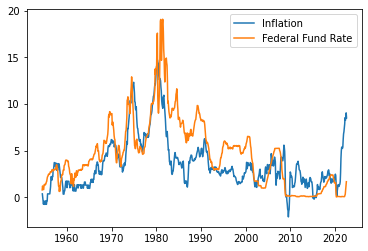

In [25]:
plt.plot(inflation_ts['1954-07-15':], label='Inflation')
plt.plot(fed_funds_ts, label='Federal Fund Rate')
plt.legend()